In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

def lsm0(x, y):
    k = np.mean(x*y) / np.mean(x**2)
    sigma_k = (1 / len(x))*np.sqrt((np.mean(y**2) / (np.mean(x**2))) - k**2)
    return [k, sigma_k]

In [7]:
lab1 = pd.read_excel("search2.xlsx")
lab1

,N,test001,test002,test003,test011,test012,test013,test101,test102,test103,test111,test112,test113
0,100,400,400,400,500,400,300,700,1200,600,800,600,600
1,2099,100,200,100,200,100,200,400,1200,300,500,700,200
2,4098,11300,11400,11500,15000,12100,11500,600,900,200,1400,400,200
3,6097,11400,11400,11500,14700,11300,11400,700,900,300,1500,600,700
4,8096,1900,1900,1900,2300,1900,1900,400,900,300,800,500,600
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,190005,202100,208500,186100,218000,351800,203500,1700,2700,1500,1900,700,2000
96,192004,102700,110100,626500,87100,128000,97200,700,800,700,700,600,700
97,194003,192800,182100,181500,178900,247800,184900,1000,700,1200,600,700,500
98,196002,507900,451400,568400,462800,701600,523100,700,800,700,900,700,1300


In [8]:
lab1["full_mean"] = lab1[['test001', 'test002', 'test003']].mean(axis=1)
lab1["full_worst"] = lab1[['test011', 'test012', 'test013']].mean(axis=1)
lab1["bin_mean"] = lab1[['test101', 'test102', 'test103']].mean(axis=1)
lab1["bin_worst"] = lab1[['test111', 'test112', 'test113']].mean(axis=1)
lab1

,N,test001,test002,test003,test011,test012,test013,test101,test102,test103,test111,test112,test113,full_mean,full_worst,bin_mean,bin_worst
0,100,400,400,400,500,400,300,700,1200,600,800,600,600,400.000000,400.000000,833.333333,666.666667
1,2099,100,200,100,200,100,200,400,1200,300,500,700,200,133.333333,166.666667,633.333333,466.666667
2,4098,11300,11400,11500,15000,12100,11500,600,900,200,1400,400,200,11400.000000,12866.666667,566.666667,666.666667
3,6097,11400,11400,11500,14700,11300,11400,700,900,300,1500,600,700,11433.333333,12466.666667,633.333333,933.333333
4,8096,1900,1900,1900,2300,1900,1900,400,900,300,800,500,600,1900.000000,2033.333333,533.333333,633.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,190005,202100,208500,186100,218000,351800,203500,1700,2700,1500,1900,700,2000,198900.000000,257766.666667,1966.666667,1533.333333
96,192004,102700,110100,626500,87100,128000,97200,700,800,700,700,600,700,279766.666667,104100.000000,733.333333,666.666667
97,194003,192800,182100,181500,178900,247800,184900,1000,700,1200,600,700,500,185466.666667,203866.666667,966.666667,600.000000
98,196002,507900,451400,568400,462800,701600,523100,700,800,700,900,700,1300,509233.333333,562500.000000,733.333333,966.666667


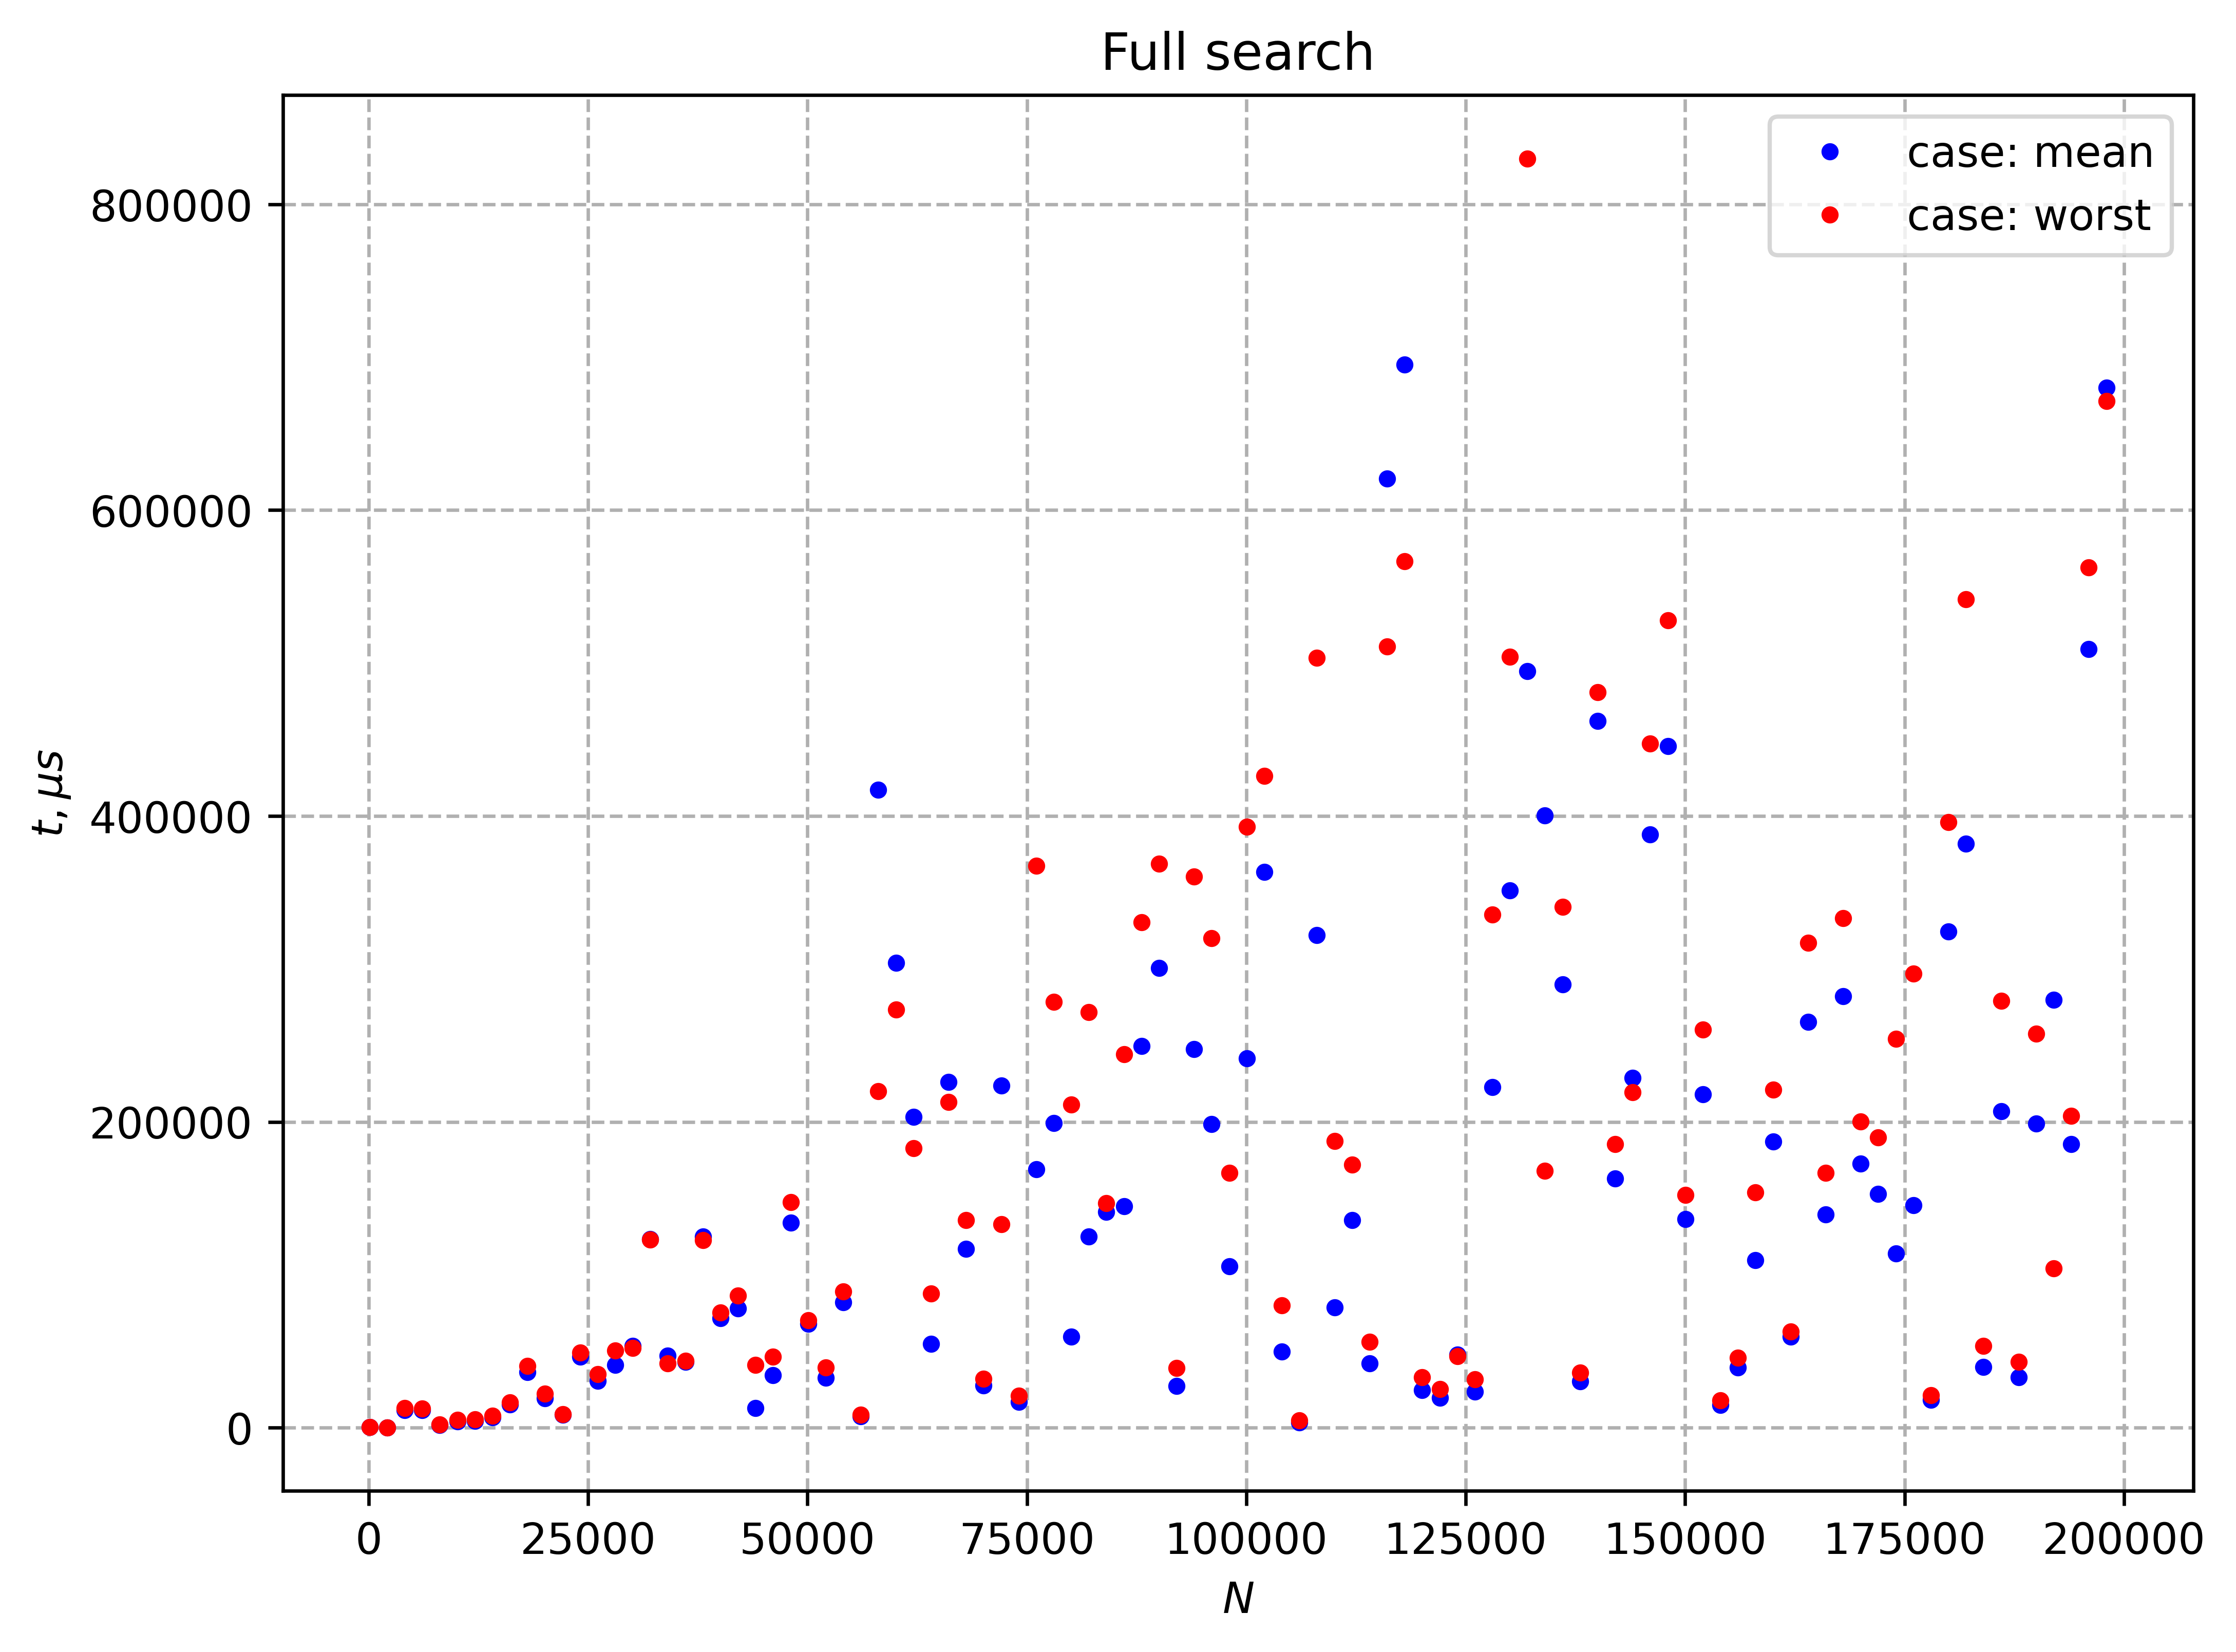

In [12]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Full search")
plt.xlabel("$N$") # подписи к осям
plt.ylabel("$t, µs$")
# plt.ylim([0, 5000])
plt.grid(True, linestyle="--") # пунктирная сетка

plt.plot(lab1["N"], lab1["full_mean"], "b.", label="case: mean")
plt.plot(lab1["N"], lab1["full_worst"], "r.", label="case: worst")

plt.legend()
plt.show()

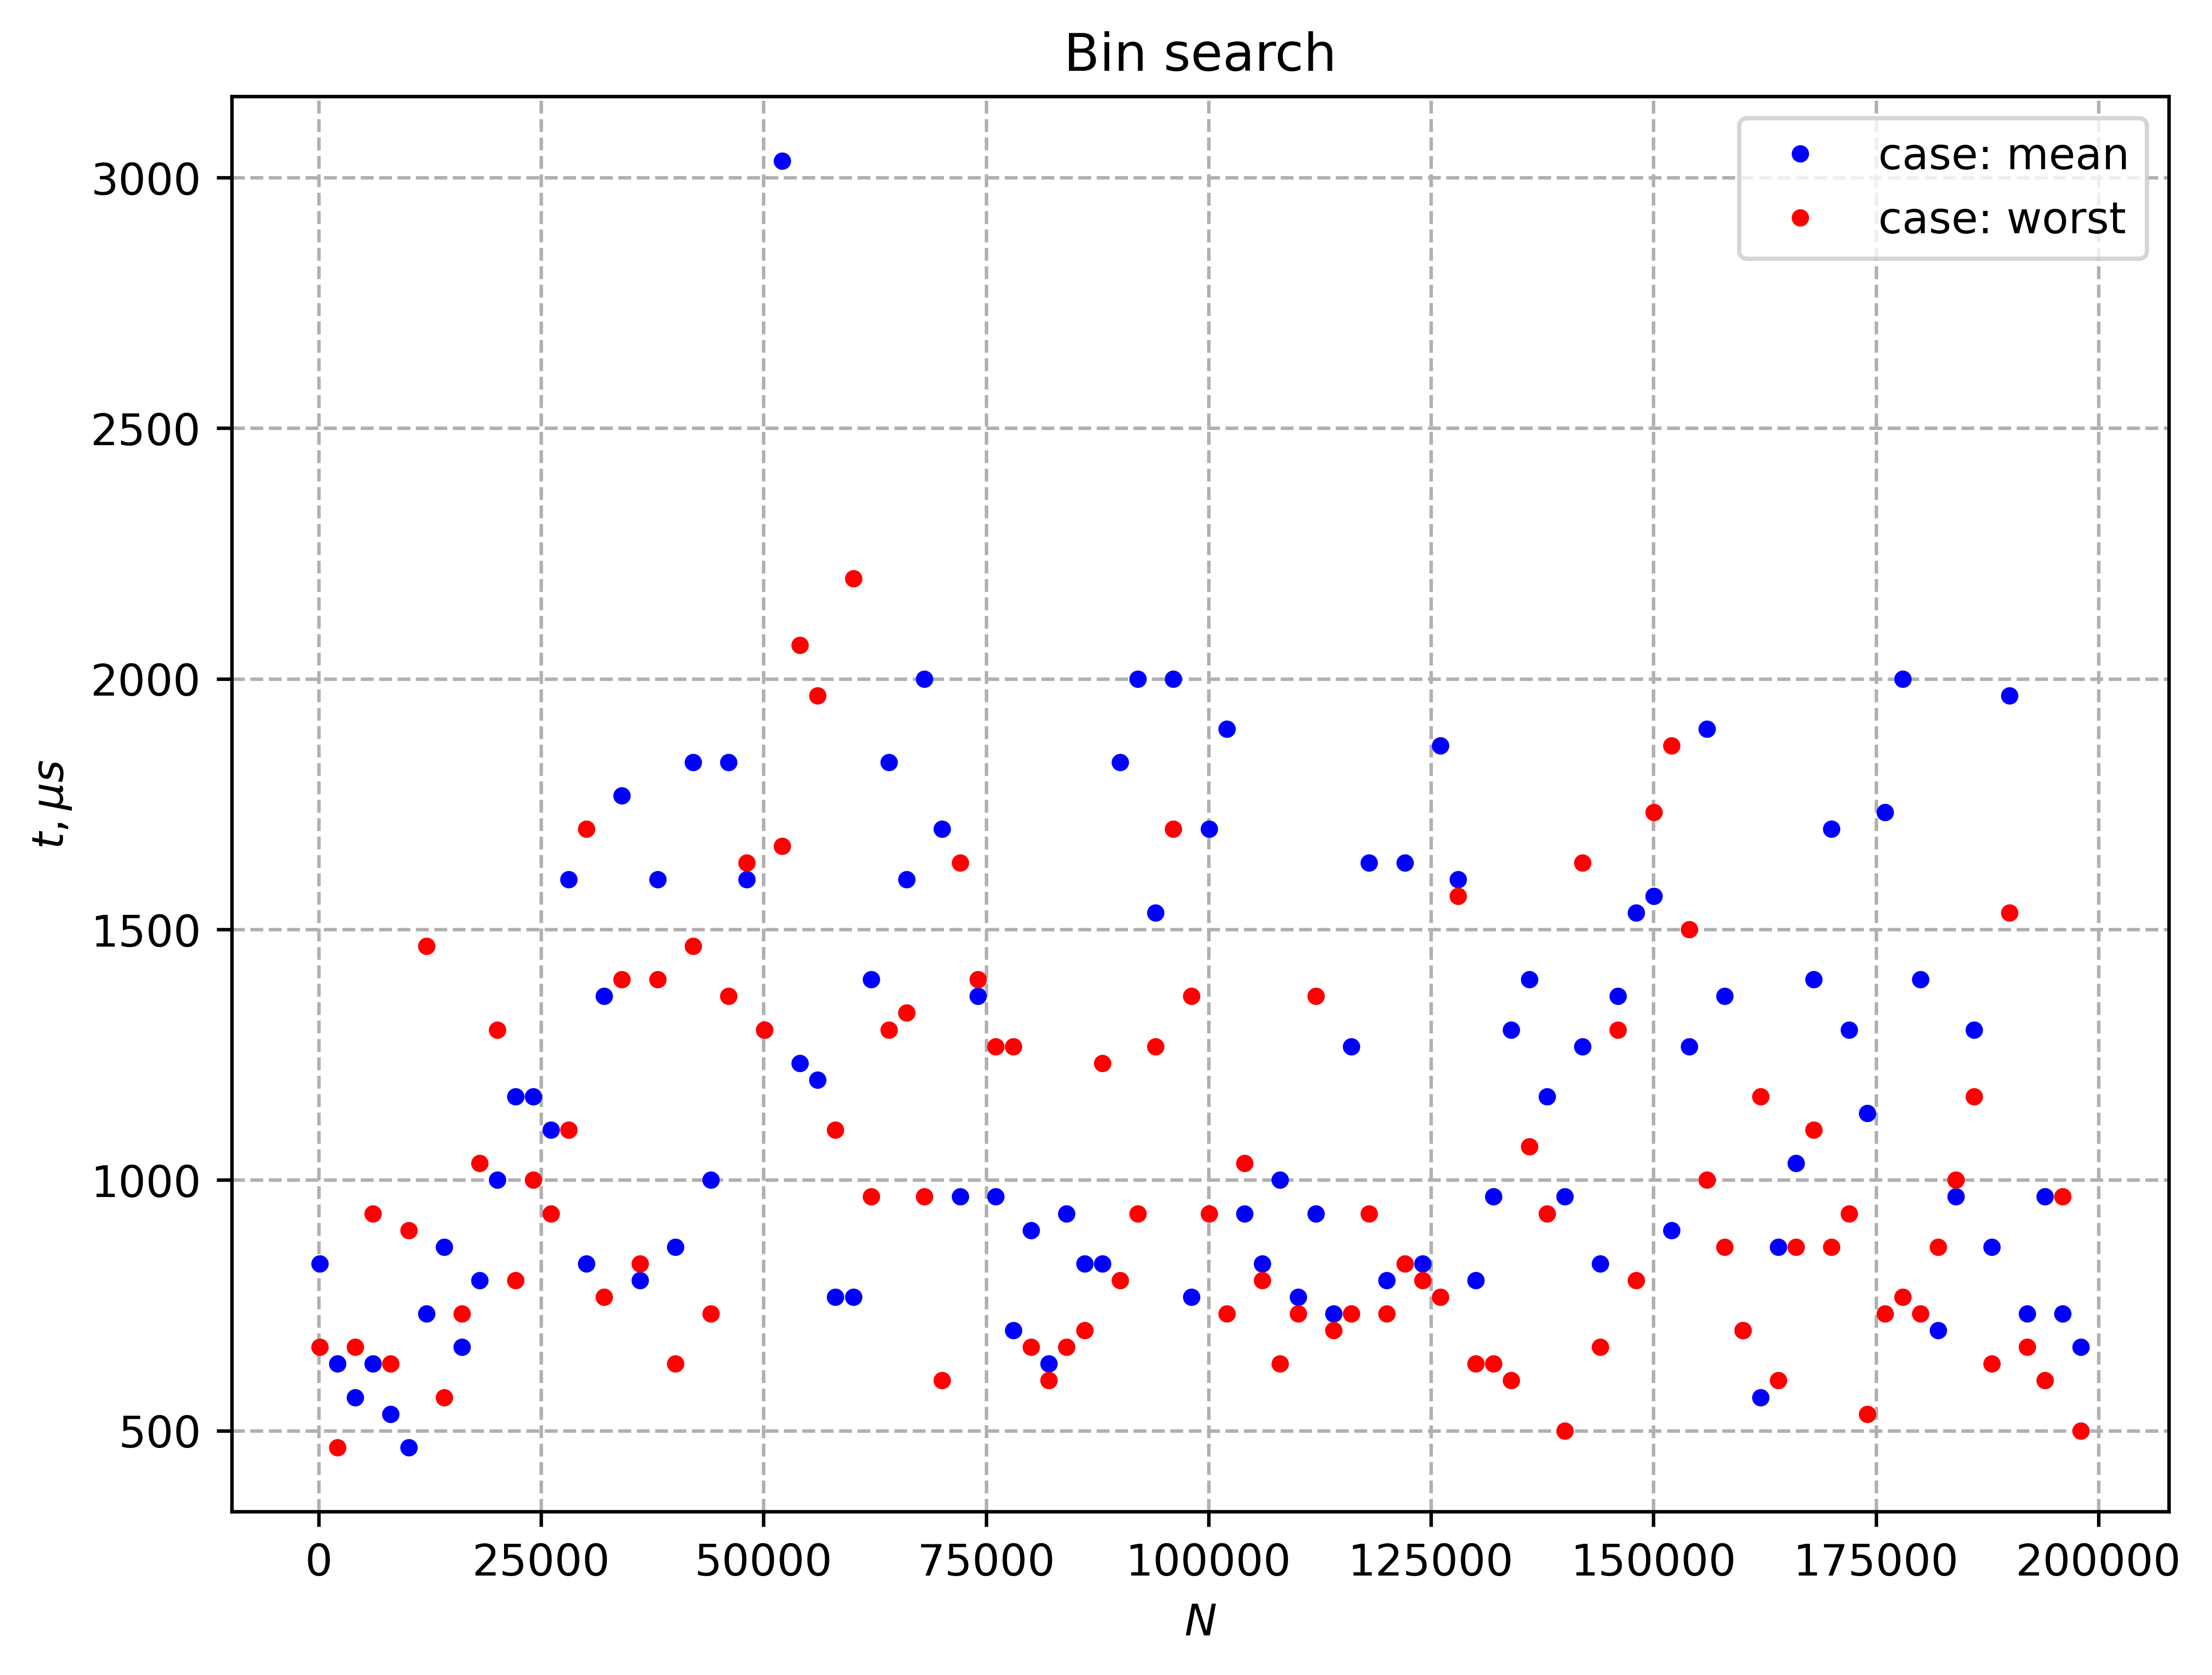

In [15]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Bin search")
plt.xlabel("$N$") # подписи к осям
plt.ylabel("$t, µs$")
# plt.ylim([0, 17.5])
plt.grid(True, linestyle="--") # пунктирная сетка

plt.plot(lab1["N"], lab1["bin_mean"], "b.", label="case: mean")
plt.plot(lab1["N"], lab1["bin_worst"], "r.", label="case: worst")

plt.legend()
plt.show()
# the last runned lined 

In [16]:
lab2 = pd.read_excel("sum_of_two.xlsx")
lab2

,N,test001,test002,test003,test004,test005,test011,test012,test013,test014,...,test101,test102,test103,test104,test105,test111,test112,test113,test114,test115
0,100,0.000006,0.000006,0.000005,0.000006,0.000006,0.000006,0.000007,0.000007,0.000032,...,0.000001,0.000001,7.000000e-07,7.000000e-07,7.000000e-07,0.000001,0.000010,0.000001,8.000000e-07,6.000000e-07
1,1099,0.000038,0.000043,0.000036,0.000038,0.000043,0.000040,0.000045,0.000070,0.000033,...,0.000004,0.000004,2.800000e-06,2.500000e-06,2.600000e-06,0.000004,0.000004,0.000004,3.500000e-06,2.400000e-06
2,2098,0.000028,0.000032,0.000026,0.000028,0.000031,0.000029,0.000034,0.000060,0.000036,...,0.000005,0.000007,4.000000e-06,3.800000e-06,3.600000e-06,0.000006,0.000006,0.000005,5.400000e-06,3.500000e-06
3,3097,0.000153,0.000172,0.000145,0.000153,0.000326,0.000161,0.000183,0.000669,0.000105,...,0.000010,0.000014,8.100000e-06,7.100000e-06,7.200000e-06,0.000012,0.000012,0.000012,1.030000e-05,6.800000e-06
4,4096,0.000018,0.000020,0.000017,0.000018,0.000020,0.000019,0.000022,0.000022,0.000013,...,0.000015,0.000017,1.270000e-05,1.450000e-05,1.060000e-05,0.000016,0.000015,0.000016,1.350000e-05,9.900000e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95005,0.015824,0.006502,0.008220,0.011953,0.054753,0.008525,0.006508,0.009669,0.007752,...,0.000290,0.000216,3.297000e-04,2.312000e-04,2.565000e-04,0.000352,0.000307,0.000387,3.309000e-04,3.599000e-04
96,96004,0.000492,0.000363,0.000435,0.002301,0.001211,0.000436,0.000362,0.000422,0.000317,...,0.000335,0.000264,2.914000e-04,2.824000e-04,2.254000e-04,0.000379,0.000286,0.000414,2.894000e-04,4.395000e-04
97,97003,0.001504,0.001081,0.001347,0.001358,0.001823,0.001487,0.001073,0.001576,0.000963,...,0.000341,0.000224,3.361000e-04,2.372000e-04,5.682000e-04,0.000353,0.000317,0.000395,3.045000e-04,4.065000e-04
98,98002,0.000588,0.000502,0.000705,0.000646,0.006224,0.000658,0.000519,0.000617,0.000405,...,0.000268,0.000318,3.114000e-04,2.202000e-04,2.550000e-04,0.000360,0.000298,0.000342,2.616000e-04,3.743000e-04


In [38]:
lab2["full_mean"] = lab2[['test001', 'test002', 'test003', 'test004', 'test005']].mean(axis=1)
lab2["full_worst"] = lab2[['test011', 'test012', 'test013', 'test014', 'test015']].mean(axis=1)
lab2["linear_mean"] = lab2[['test101', 'test102', 'test103', 'test104', 'test105']].mean(axis=1)
lab2["linear_worst"] = lab2[['test111', 'test112', 'test113', 'test114', 'test115']].mean(axis=1)
lab2

,N,test001,test002,test003,test004,test005,test011,test012,test013,test014,...,test105,test111,test112,test113,test114,test115,full_mean,full_worst,linear_mean,linear_worst
0,100,0.000006,0.000006,0.000005,0.000006,0.000006,0.000006,0.000007,0.000007,0.000032,...,7.000000e-07,0.000001,0.000010,0.000001,8.000000e-07,6.000000e-07,0.000006,0.000011,8.400000e-07,0.000003
1,1099,0.000038,0.000043,0.000036,0.000038,0.000043,0.000040,0.000045,0.000070,0.000033,...,2.600000e-06,0.000004,0.000004,0.000004,3.500000e-06,2.400000e-06,0.000039,0.000046,3.240000e-06,0.000004
2,2098,0.000028,0.000032,0.000026,0.000028,0.000031,0.000029,0.000034,0.000060,0.000036,...,3.600000e-06,0.000006,0.000006,0.000005,5.400000e-06,3.500000e-06,0.000029,0.000038,4.680000e-06,0.000005
3,3097,0.000153,0.000172,0.000145,0.000153,0.000326,0.000161,0.000183,0.000669,0.000105,...,7.200000e-06,0.000012,0.000012,0.000012,1.030000e-05,6.800000e-06,0.000190,0.000258,9.300000e-06,0.000011
4,4096,0.000018,0.000020,0.000017,0.000018,0.000020,0.000019,0.000022,0.000022,0.000013,...,1.060000e-05,0.000016,0.000015,0.000016,1.350000e-05,9.900000e-06,0.000019,0.000019,1.388000e-05,0.000014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95005,0.015824,0.006502,0.008220,0.011953,0.054753,0.008525,0.006508,0.009669,0.007752,...,2.565000e-04,0.000352,0.000307,0.000387,3.309000e-04,3.599000e-04,0.019450,0.007943,2.646200e-04,0.000347
96,96004,0.000492,0.000363,0.000435,0.002301,0.001211,0.000436,0.000362,0.000422,0.000317,...,2.254000e-04,0.000379,0.000286,0.000414,2.894000e-04,4.395000e-04,0.000960,0.000444,2.796800e-04,0.000362
97,97003,0.001504,0.001081,0.001347,0.001358,0.001823,0.001487,0.001073,0.001576,0.000963,...,5.682000e-04,0.000353,0.000317,0.000395,3.045000e-04,4.065000e-04,0.001423,0.001270,3.412000e-04,0.000355
98,98002,0.000588,0.000502,0.000705,0.000646,0.006224,0.000658,0.000519,0.000617,0.000405,...,2.550000e-04,0.000360,0.000298,0.000342,2.616000e-04,3.743000e-04,0.001733,0.000556,2.744000e-04,0.000327


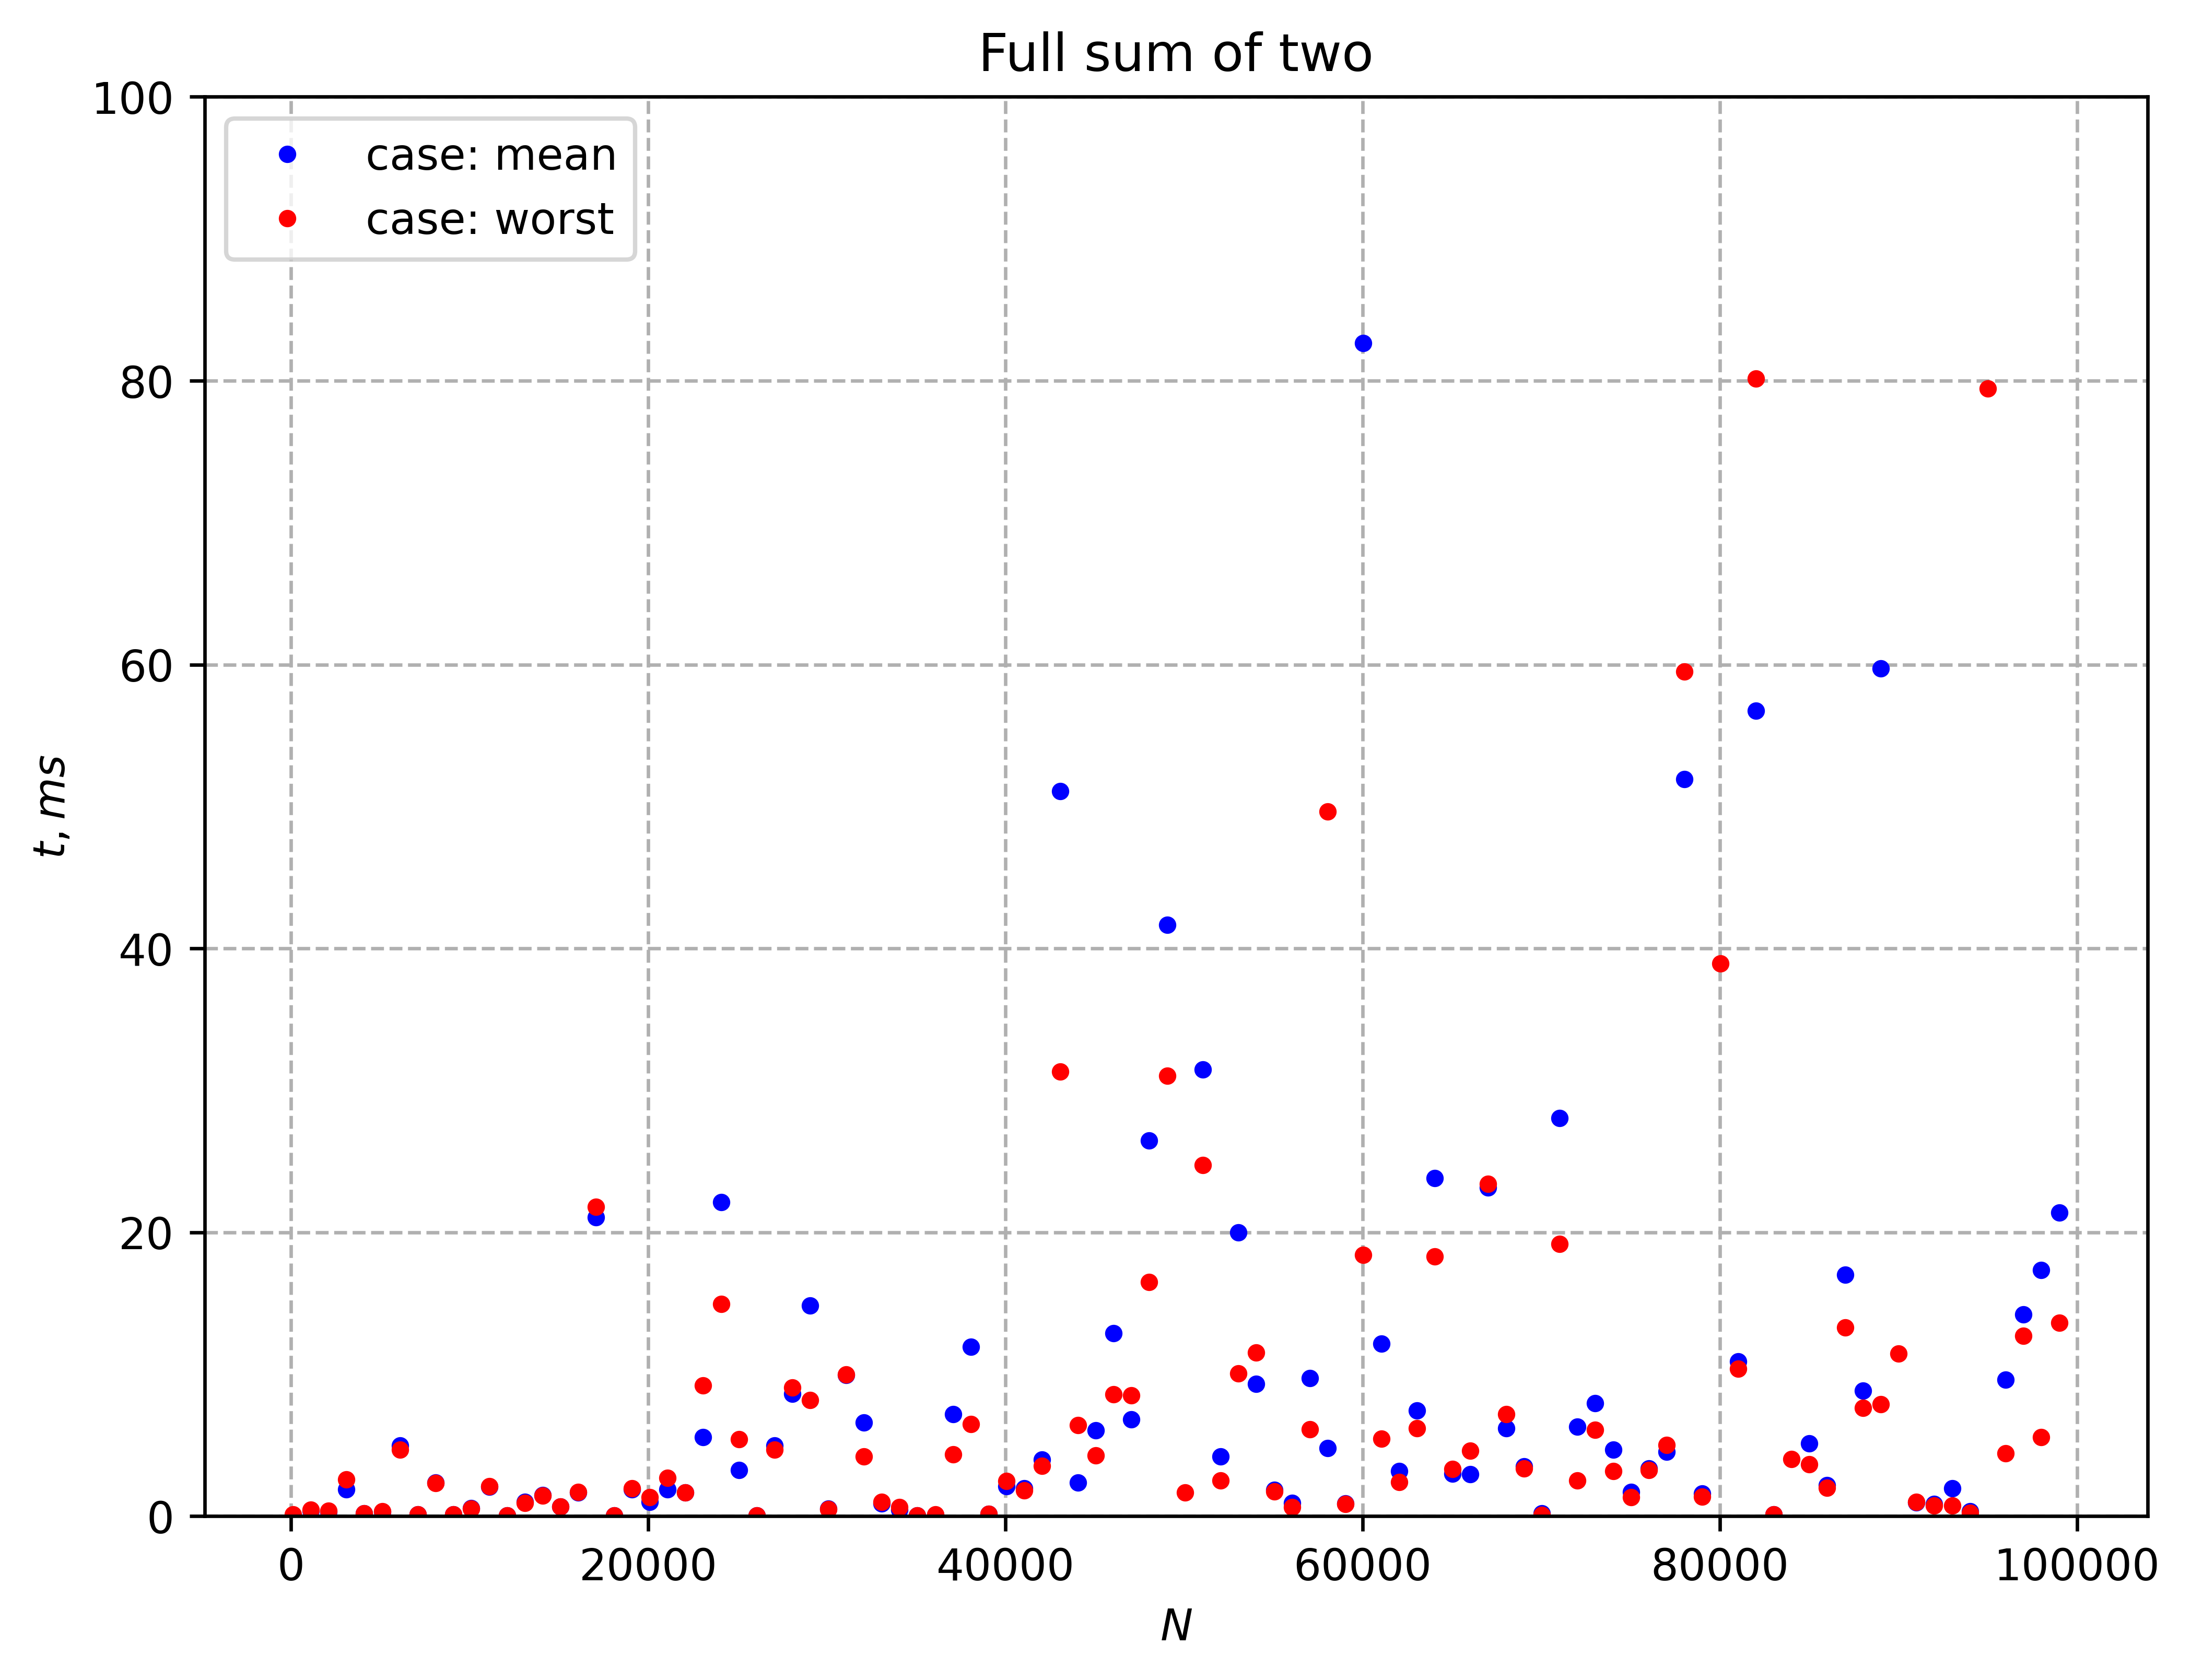

In [46]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Full sum of two")
plt.xlabel("$N$") # подписи к осям
plt.ylabel("$t, ms$")
plt.ylim([0, 100])
plt.grid(True, linestyle="--") # пунктирная сетка

plt.plot(lab2["N"], 10e3*lab2["full_mean"], "b.", label="case: mean")
plt.plot(lab2["N"], 10e3*lab2["full_worst"], "r.", label="case: worst")

plt.legend()
plt.show()

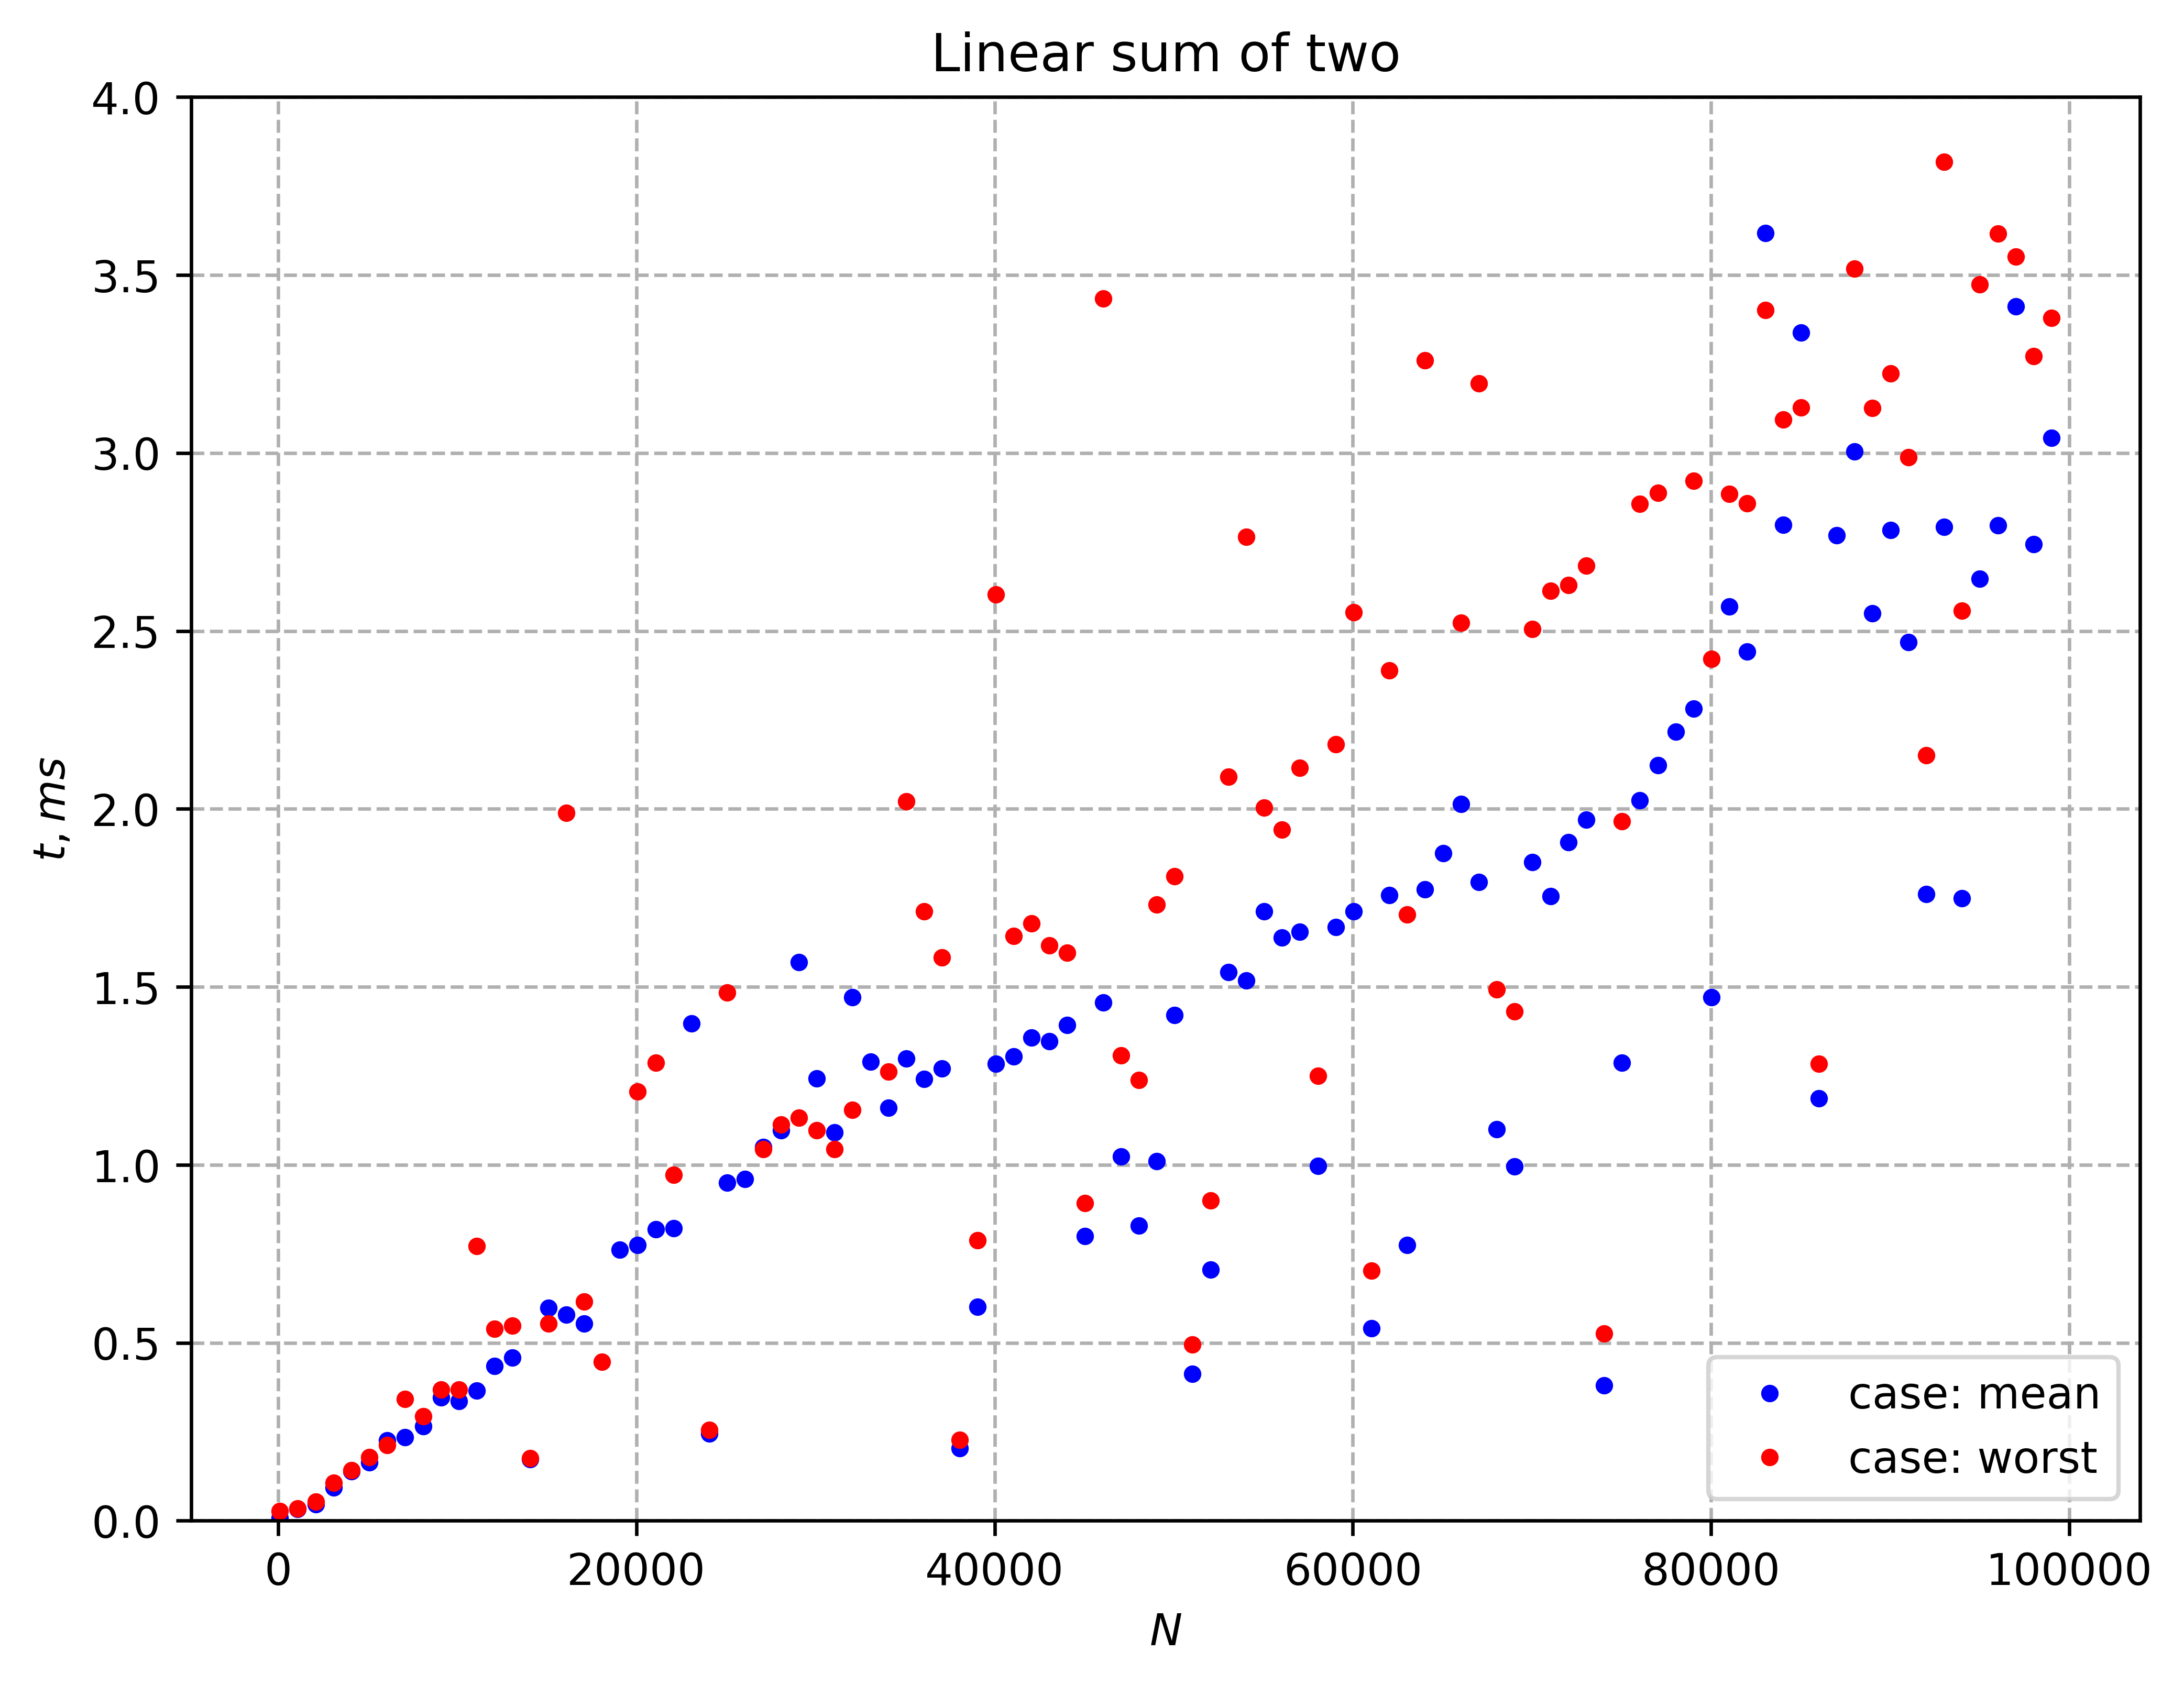

In [49]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Linear sum of two")
plt.xlabel("$N$") # подписи к осям
plt.ylabel("$t, ms$")
plt.ylim([0, 4])
plt.grid(True, linestyle="--") # пунктирная сетка

plt.plot(lab2["N"], 10e3*lab2["linear_mean"], "b.", label="case: mean")
plt.plot(lab2["N"], 10e3*lab2["linear_worst"], "r.", label="case: worst")

plt.legend()
plt.show()

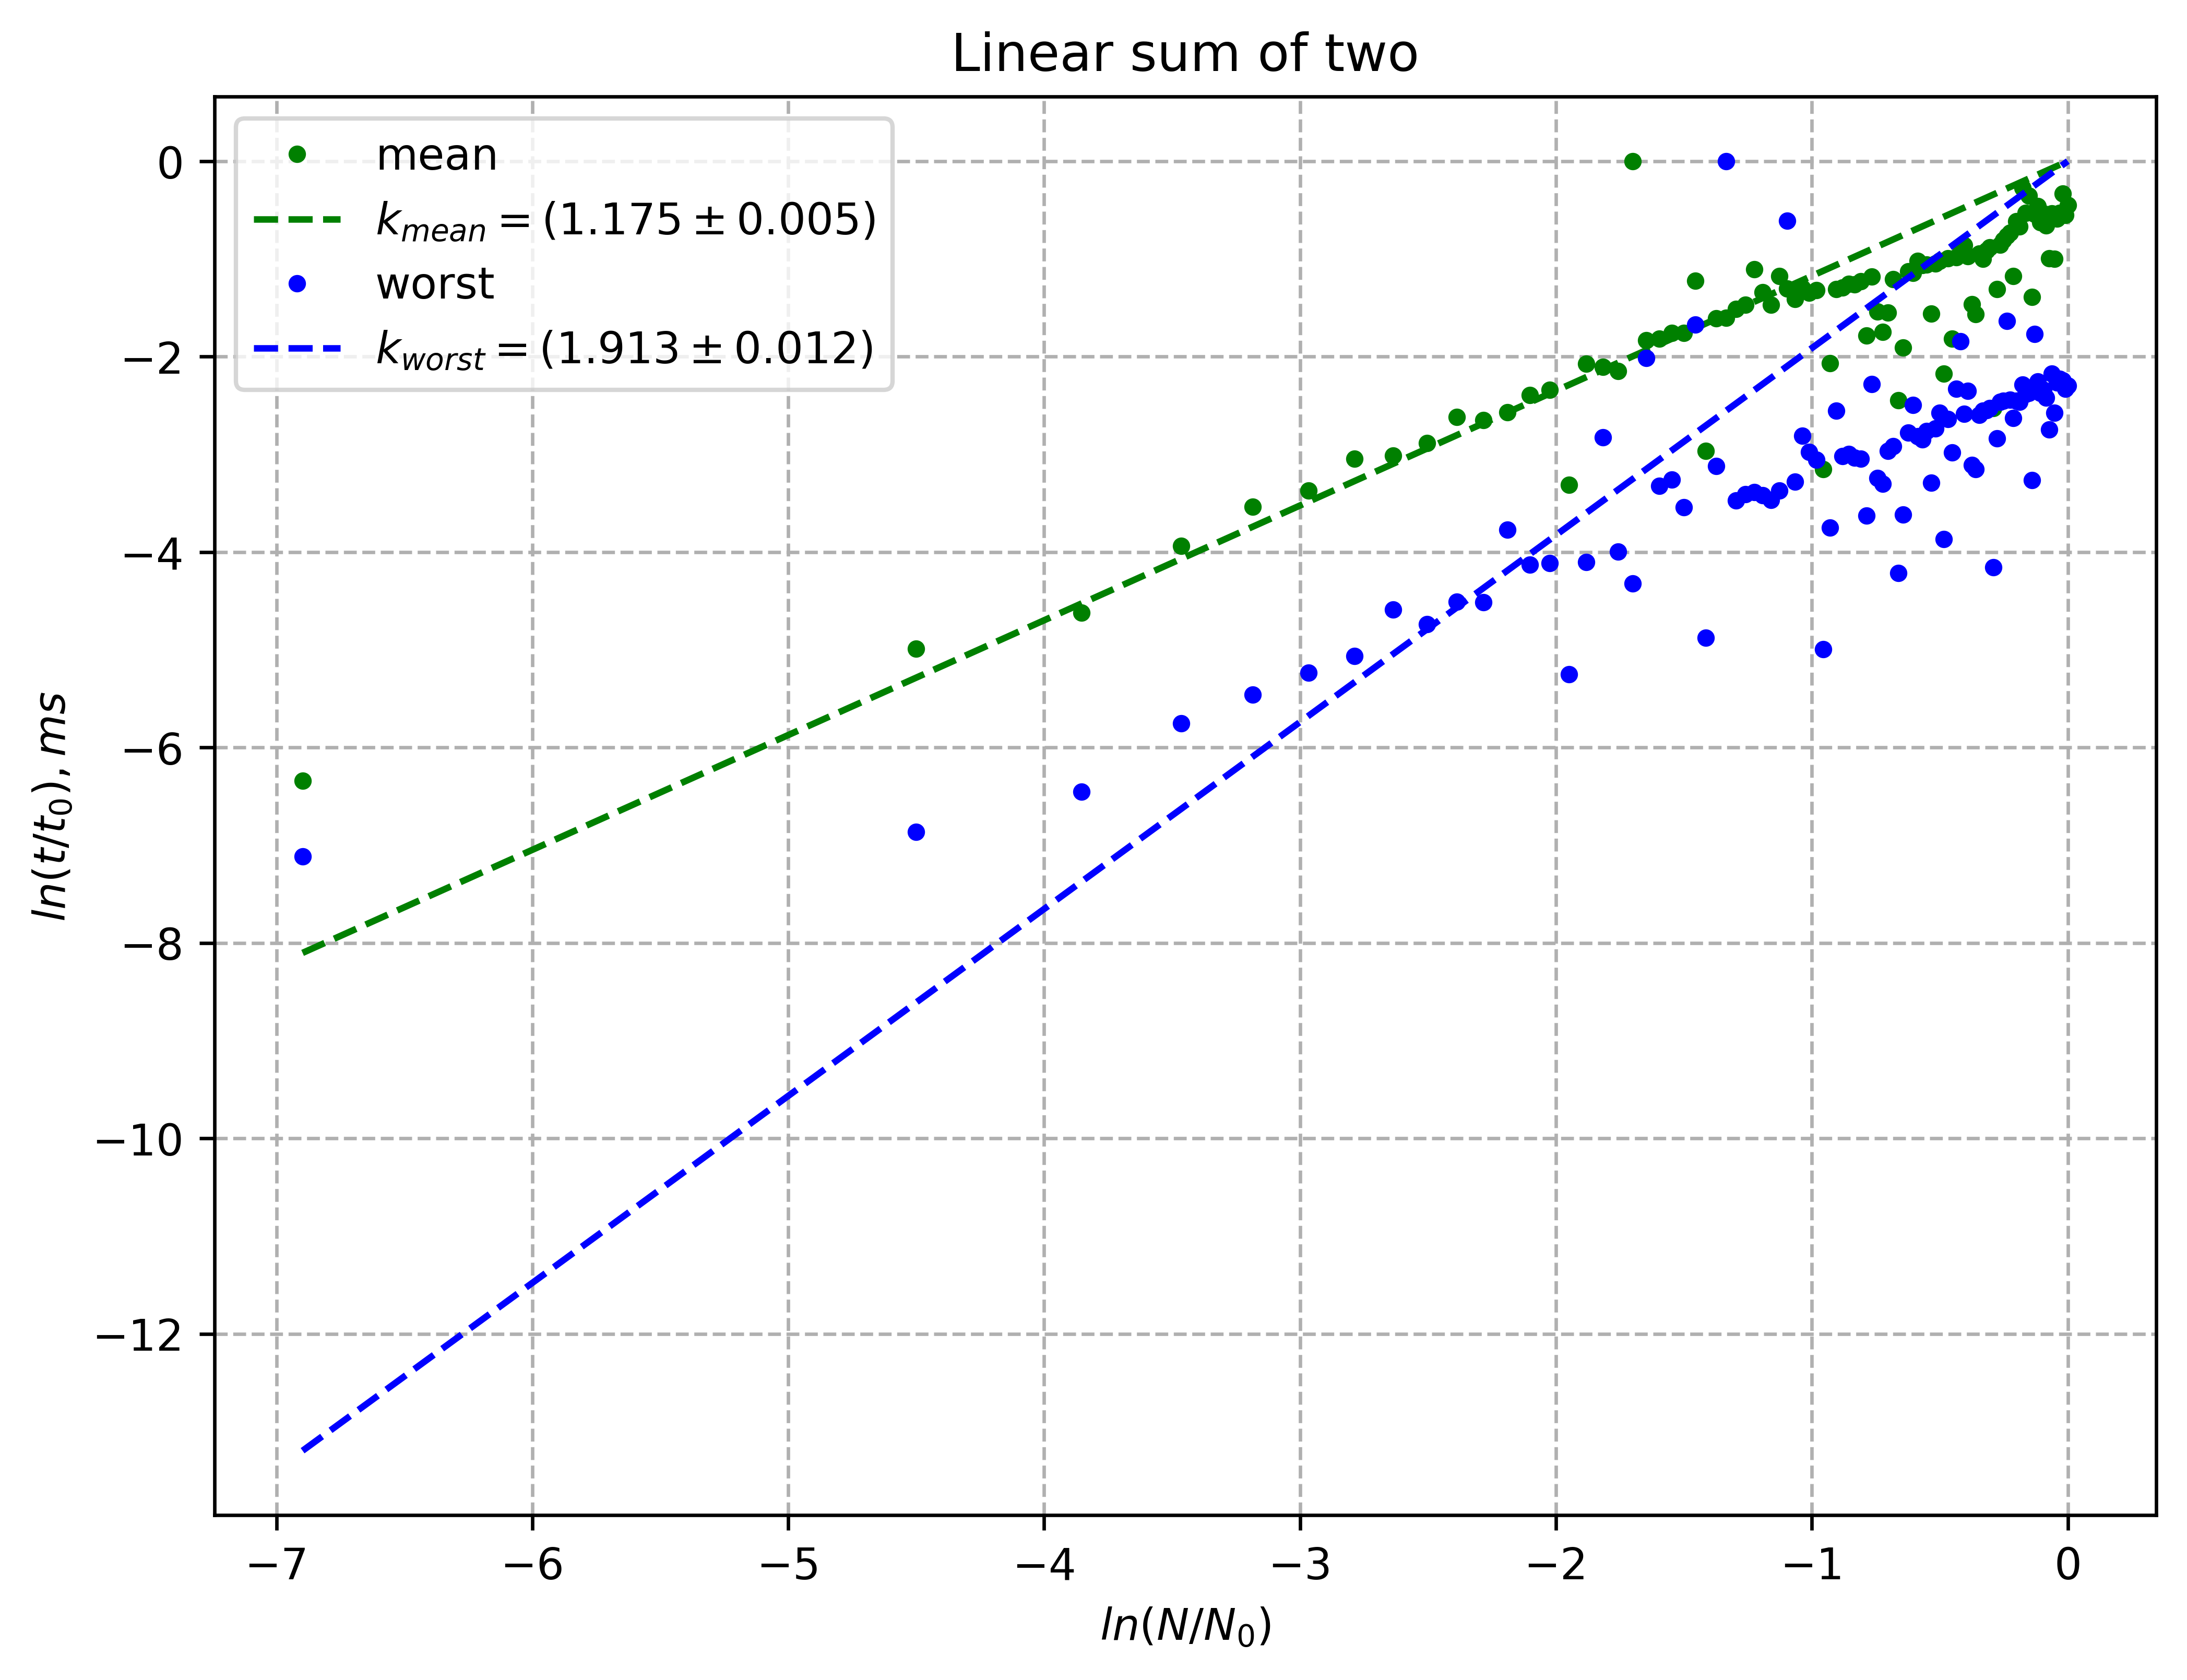

In [61]:
plt.figure(figsize=(8,6), dpi = 600) # размер графика
plt.title(r"Linear sum of two")
plt.xlabel("$ln(N/N_0)$") # подписи к осям
plt.ylabel("$ln(t/t_0), ms$")
plt.grid(True, linestyle="--") # пунктирная сетка

lab2["log_N"] = np.log(lab2["N"] / max(lab2["N"])) 
lab2["log_linear_mean"] = np.log(lab2["linear_mean"] / max(lab2["linear_mean"]))
lab2["log_linear_worst"] = np.log(lab2["linear_worst"] / max(lab2["linear_worst"]))

k_mean, sigma_k_mean = lsm0(lab2["log_N"], lab2["log_linear_mean"])
k_worst, sigma_k_worst = lsm0(lab2["log_N"], lab2["log_linear_worst"])

plt.plot(lab2["log_N"], lab2["log_linear_mean"], 'g.', label="mean")
plt.plot(lab2["log_N"], k_mean*lab2["log_N"],'g--', 
         label=r"$k_{mean} = (%.3f \pm %.3f)$" % (k_mean, sigma_k_mean))

plt.plot(lab2["log_N"], lab2["log_linear_worst"], 'b.', label="worst")
plt.plot(lab2["log_N"], k_worst*lab2["log_N"],'b--', 
         label=r"$k_{worst} = (%.3f \pm %.3f)$" % (k_worst, sigma_k_worst))

plt.legend()
plt.show()